***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/syp-implementation/blob/main/README.md) >

## CompTIA Security+ - Course Material 2022
###### Topic: ``Port Security``
***

Course material for the ``CompTIA Security+`` module of the ``ICT Associate Apprenticeship (Cybersecurity)`` programme.

<a id="top"></a>
***
## Table of Contents
***

### [Port Security](#a) <br/><br/>

- [Broadcasts](#b) <br/><br/>
    - [Storm Control](#c) <br/><br/>
- [Loop Protection](#d) <br/><br/>
    - [``802.D``](#d) <br/><br/>
        - [Spanning Tree Protocol](#e) <br/><br/>
            - [``STP``](#e) <br/><br/>
                - [BPDU Guard](#f) <br/><br/>
- [Control Technology](#g) <br/><br/>
    - [DHCP Snooping](#g) <br/><br/>
    - [MAC Filtering](#h) 
<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="a"></a>
***
### Port Security
***

Port security is not just about physical interfaces on a switch or router - not talking about TCP or UDP ports in this particular usage of the word port, in this notebook, think of it as that physical connection you’re making to a switch or router.

The goal with port security is to maintain uptime and availability of the communication across the network - want to limit the overall traffic on the network - there may be certain traffic types that need to be controlled as they’re going across the network, and we certainly want to remove any unwanted network traffic from those connections.

There are many different types of devices that we would have on our network, and many different protocols and applications that are using those networks, so we will use different techniques to be able to provide security at the port level.

< [Table of Contents](#top) | [References](#references) >
<a id="b"></a>
***
###### Broadcasts
***

One challenge we have on our networks is with broadcasts. 

Broadcasts are packets that are sent from one device that are addressed to everybody else who happens to be on the network.

When that information is sent out, every single device on the network has to examine the information that’s inside of that packet - if there are many broadcasts traversing the network, this could cause everyone to stop and evaluate what is inside of those packets, and it would use unnecessary bandwidth on the network as well.

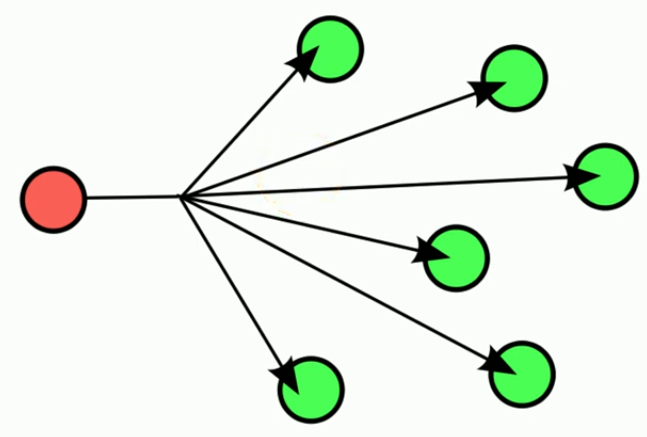

Fortunately, broadcasts have a limited scope - they can only traverse the networks that are connected in a single broadcast domain - referring to using a VLAN on a network, that VLAN is a broadcast domain and any broadcast sent to that VLAN will only be sent to other devices that are on that same VLAN.

With IPv4 it’s very common to see broadcasts being sent over the network - protocols such as routing updates and ARP requests commonly use broadcasts to be able to communicate to other devices on the network.

Unfortunately, broadcasts can also be malicious traffic, or unwanted traffic, as well, so we need to have some way to manage and control the good broadcast traffic from the bad broadcast traffic.

If done any work with IPv6, one of the things you’ll notice is that there’s no broadcasts - one of the things we did when we implemented IPv6 was focus on multicast, rather than broadcasts, which are much easier to manage.

< [Table of Contents](#top) | [References](#references) >
<a id="c"></a>
***
###### Broadcasts - Storm Control
***

Many of our managed switches can be used to control broadcasts - there’s functionality within the software of the switch itself that allows us to limit the number of broadcasts that can be sent in any particular second. 

Some of these switches can even provide control of multicast, and unicast as well, giving the administrator of the network a tight level of control over what type of traffic is sent on the network.

There might also be a way to limit broadcast by a certain finite value, for example, you might want to limit 100 broadcasts per second, or 1,000 broadcasts per second but you can also have the switch monitor the amount of broadcasts, and if it increases by a large percentage in a short period of time, you can have those broadcasts removed from the network as well.

< [Table of Contents](#top) | [References](#references) >
<a id="d"></a>
***
###### Loop Protection - ``802.D``
***

One challenge we have with our layer 2 networks is there’s no mechanism built into layer 2 communication that is able to recognize and remove loops from the network - this makes it very easy for us to accidentally bring down the network by simply connecting two networks to each other into a loop configuration.

It’s surprising how easy it is to do this, especially if you’re moving around a lot of cables inside of a wiring closet and you accidentally plug the wrong cable into the wrong interface, fortunately, there is a standard for preventing loops on switch networks that is from the IEEE - the standard called the 802.1D standard that was created by Radia Perlman to prevent loops on any type of switch network.

< [Table of Contents](#top) | [References](#references) >
<a id="e"></a>
***
###### Loop Protection - ``802.D`` - Spanning Tree Protocol - ``STP``
***

The standard is called Spanning Tree Protocol, or STP and it’s a very common way to implement loop control on layer 2 networks.

Have a design for a layer 2 network here - can see there are a number of bridges, or switches, on this network, five of them, and they’re connecting many different networks together.

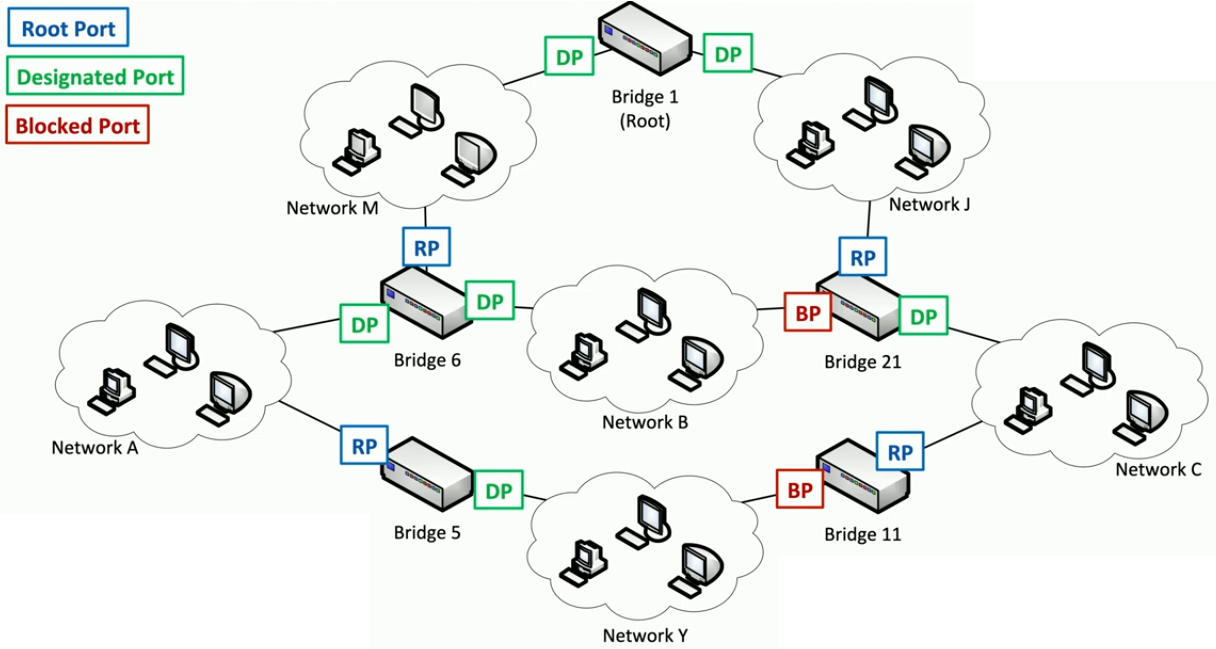

Can see in this design that there’s many opportunities to create loops, for example, if you’re on Network M, you could communicate through Bridge 6, then network B, then Bridge 21, then network J, back to Bridge 1, and finally, back to Network M and the process can go around, and around, and around, unless you’re using Spanning Tree Protocol.

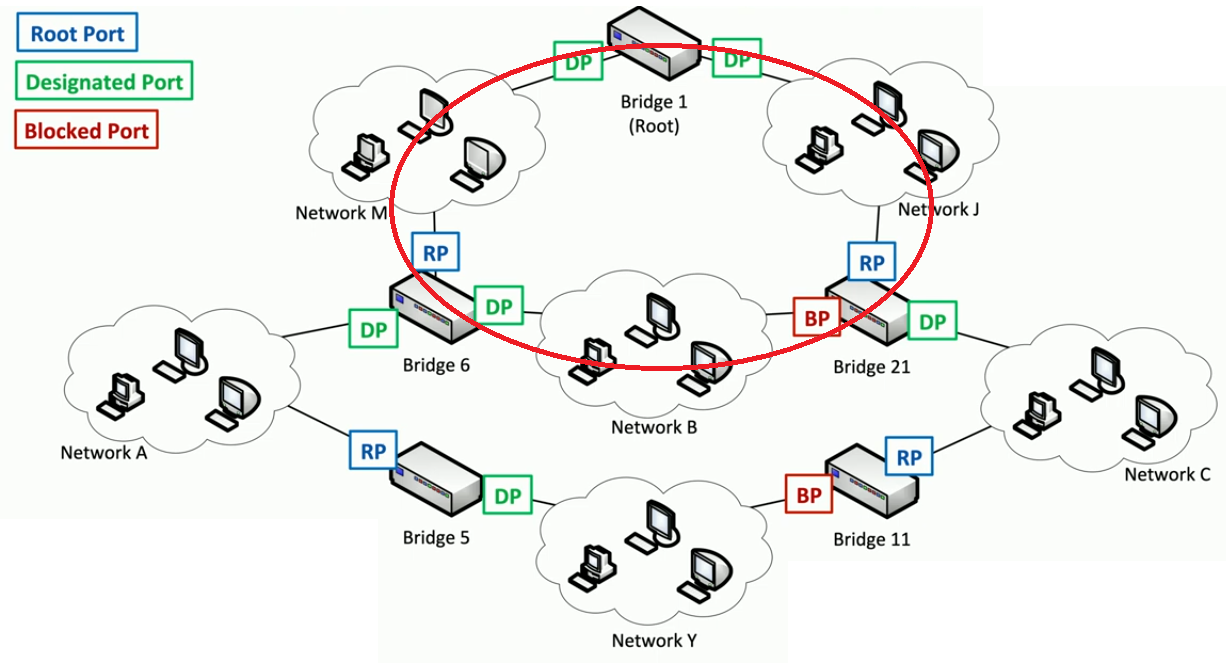

Spanning Tree is enabled and anywhere you see BP, which is a Blocked Port, that is a port that has been administratively disabled because of Spanning Tree, to prevent loops on the network. 

This means that Network M could not loop all the way through the network because they would be blocked at this interface on Bridge 21.

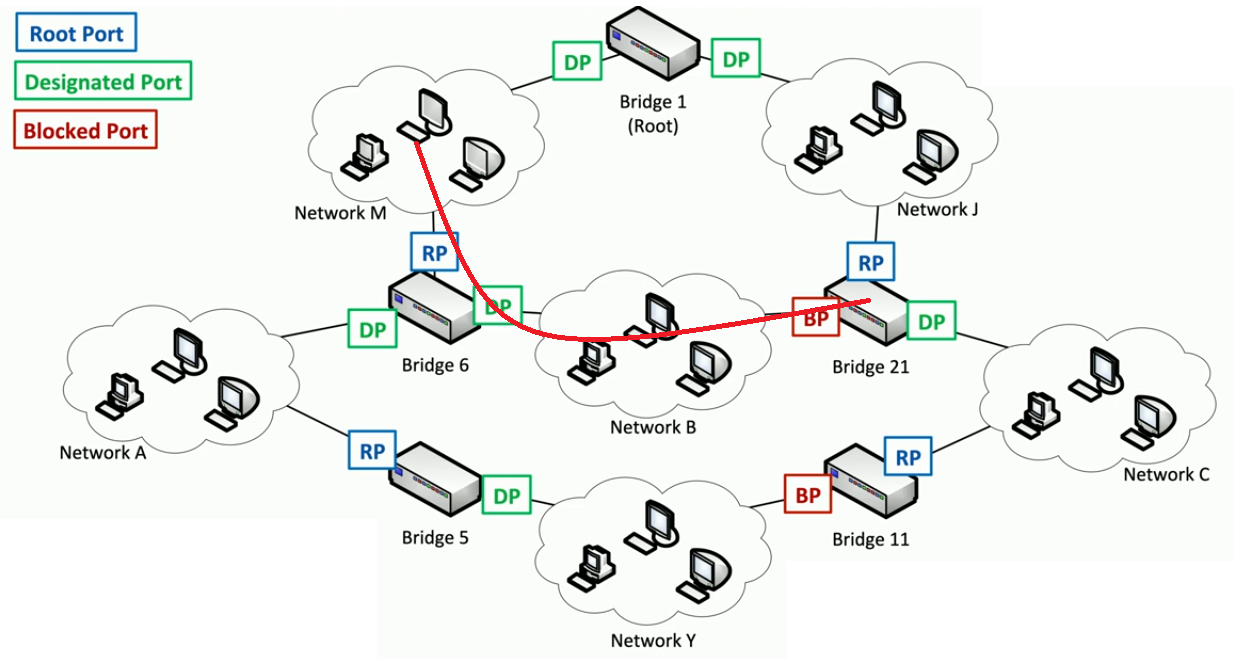

Spanning Tree is also good at finding problems that occur, and working around those problems, for example, if Network M wanted to communicate to Network Y, it would hop through Bridge 6, then Network A, then Bridge 5, and then finally down to Network Y.

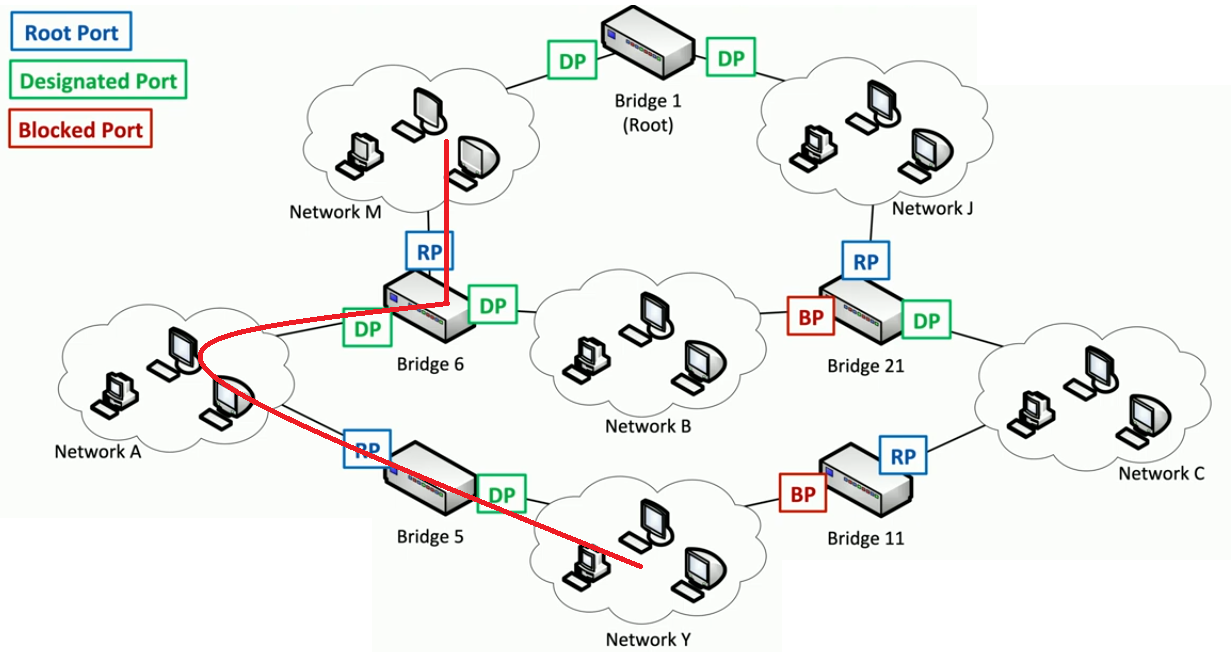

> What if there was an outage on the network? 

> What if a cable was disconnected, or a switch happened to go bad? 

In that case, we would lose the connectivity that we had between Bridge 6 and Network A, and now we would no longer be able to follow that path between Network M and Network Y.

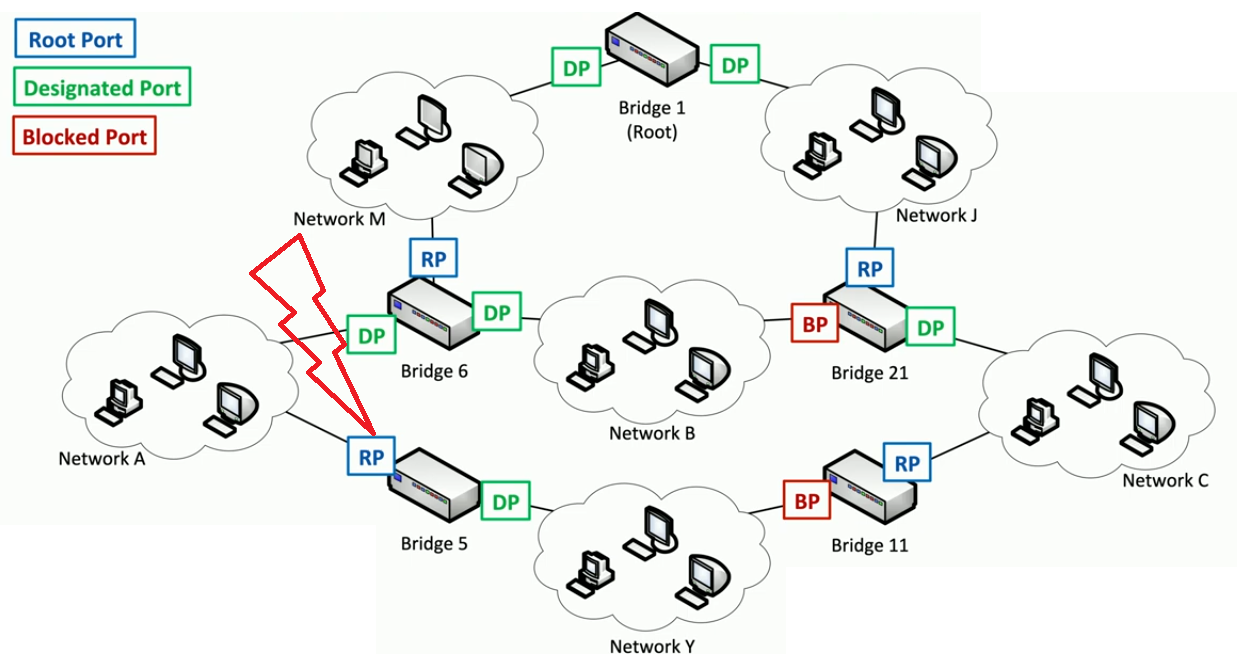

Fortunately, Spanning Tree is constantly monitoring itself for situations like this, and it will put the network into a convergence mode, where it will begin examining what interfaces are available, and what interface are not available based on this particular outage.

In this example, it is found that there are some interfaces that it’s able to change, and it’s able to remove the block that was on Bridge 11, allowing Network M to use a different path to communicate to Network Y.

Now Network M would communicate through Bridge 1, Network J, Bridge 21, Network C, and Bridge 11, to finally talk to Network Y.

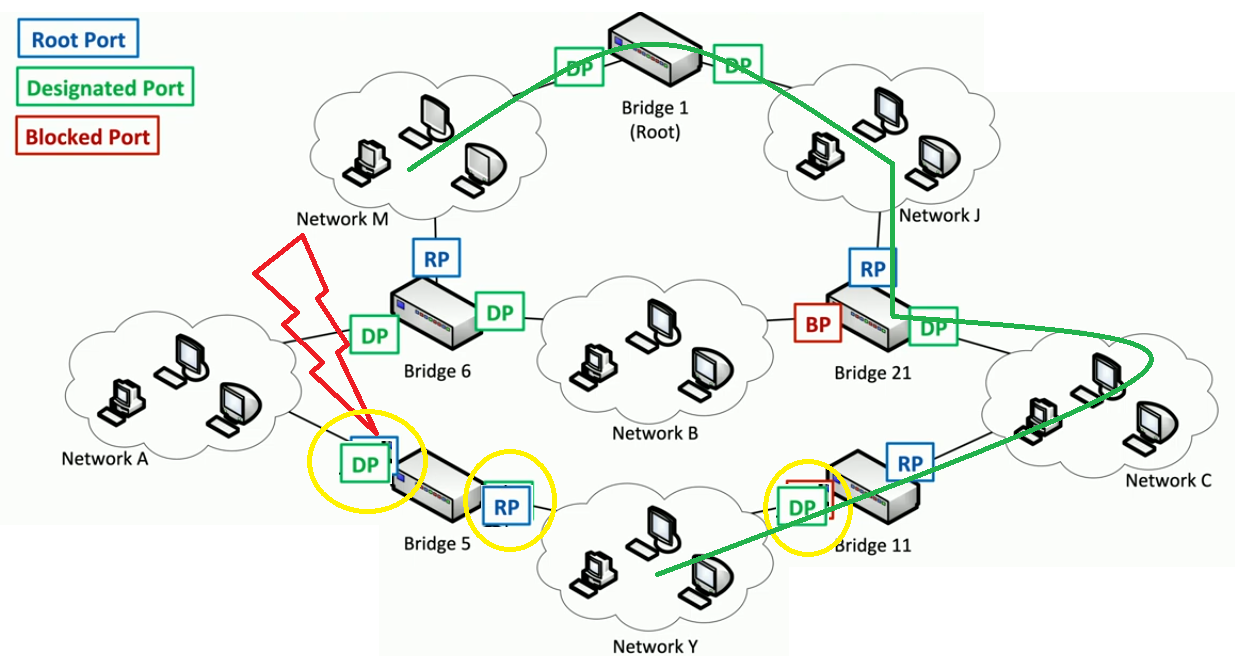

So it was able to work around the problem, still maintain communication to that network, but also prevent any type of loops, thanks to Spanning Tree Protocol.

< [Table of Contents](#top) | [References](#references) >
<a id="f"></a>
***
###### Loop Protection - ``802.D`` - Spanning Tree Protocol - ``STP`` - BPDU Guard
***

One of the challenges with initial implementations of Spanning Tree is when you first connect to the network, it might take 20 to 30 seconds before Spanning Tree understands exactly what path it should use to be able to communicate on the network.

Since we’re plugging in a single device, there should never be a situation where our single device would create a loop but Spanning Tree doesn’t know that, so it has to perform the same checks every time we plug into the network.

Instead of having this delay when individual devices connect, we can configure the switch and let it know that the only thing that would be plugging in to that physical interface on the switch, is somebody’s end station and don’t have to go through the listening and learning process that Spanning Tree would normally use - instead, can plug the device in and instantly start communicating on the network. 

On Cisco switches, this capability is called PortFast. The problem, of course, is that someone could plug into that connection another switch, and then there would be a loop created over that connection. 

To be able to combine the speed of having PortFast, and the security of Spanning Tree, we can configure BPDU guard on the switch. BPDU stands for Bridge Protocol Data Unit, and it’s the primary protocol used by the Spanning Tree Protocol. 

With BPDU guard, the switch is constantly watching the communication coming from these interfaces and if the interface ever sends a BPDU frame, then it recognizes that there could be a switch on the other side of this communication then PortFast would no longer apply, and it would disable that interface before there was an opportunity for a loop to occur.

< [Table of Contents](#top) | [References](#references) >
<a id="g"></a>
***
###### Control Technology - DHCP Snooping
***

Another challenge we have on switches is that someone could plug in a DHCP server that was not authorized to be on the network, thereby creating either a denial of service situation, or a potential security issue. 

Fortunately, switches have software inside of them that can also look for these types of problems. This is called DHCP Snooping - Dynamic Host Configuration Protocol.

The switch would be configured with a series of trusted interfaces that may have routers, switches, and other DHCP servers on it, but it would have other interfaces that are not trusted - these might have other computers, and of course, DHCP servers that would not be authorized to be on the network.

The switch is constantly monitoring the conversations that are occurring over these interfaces and if the DHCP protocol appears, and it’s coming from one of the untrusted interfaces on that switch, the switch can filter out that DHCP conversation, and not allow it to be sent to any of the other devices on the network.

< [Table of Contents](#top) | [References](#references) >
<a id="h"></a>
***
###### Control Technology - MAC Filtering
***

Another type of control technology used on our switches, routers, and other devices, is MAC filtering and it’s referring to the physical interface that is on our ethernet cards. 

MAC filtering allows the administrator of this device to either allow or disallow traffic based on the MAC address that’s communicating through the network.

This means that you could configure your switch to allow communication for all of the devices that are on the inside of your network but if someone comes in with their own device and plugs in, that device would not be able to communicate across those network links.

One of the challenges with MAC filtering is there’s no security mechanism at Layer 2 that can obscure or encrypt these MAC addresses. That means that anyone could connect to the network, they could listen, and collect a list of all of the MAC addresses that are allowed on the network, and then simply change their MAC address to match one of the MAC addresses that’s allowed.

This obviously is not a very strong security mechanism, which means that MAC filtering is really more of an administrative tool - often refer to MAC filtering as security through obscurity, because if you know the mechanism that’s being used to provide this filtering, it’s very easy to circumvent the security controls.

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

J. "Professor" Messer, "CompTIA Security+ (SY0-601) Course Notes," [professormesser.com](https://web.archive.org/web/20220521181010/https://www.professormesser.com/security-plus/sy0-601/sy0-601-video/sy0-601-comptia-security-plus-course/), September 2021.

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\SeanOhAileasa\AppData\Local\Temp\ipykernel_16012\1322614208.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


# END JUPYTER NOTEBOOK